<a href="https://colab.research.google.com/github/leoliu5550/colab_for_nn_homework/blob/master/BATCH_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 批訓練
目的：提升訓練模型的效率

[來源解釋](https://ithelp.ithome.com.tw/articles/10219945)



1.   Epoch(一代訓練) ：使用訓練資料集的全部數據進行一次訓練
2.   Batch(一批數據) ：使用訓練資料集的一小部分對模型進行一次反向更新
3.   Iteration(一次訓練)  ：使用一個Batch的數據進行一次參數更新的過程





In [1]:
import torch
import torch.utils.data as Data

## Batch = 5 每次只取5筆資料進行更新

In [2]:
BATCH_SIZE=5

## 建立數據

In [16]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())  # noisy y data (tensor), shape=(100, 1)


## 資料放入Batch中
[詳細參數設定](https://zhuanlan.zhihu.com/p/117270644)

In [17]:
torch_dataset = Data.TensorDataset(x, y)
loader = Data.DataLoader(
    dataset=torch_dataset,      # torch TensorDataset format
    batch_size=BATCH_SIZE,      # mini batch size
    shuffle=True,           # random shuffle for training
    num_workers=2,          # subprocesses for loading data 提取出數據時，是用兩個進程來提取
)

# 建立神經網路

In [18]:
net1 = torch.nn.Sequential(
    torch.nn.Linear(1,10),
    torch.nn.ReLU(),
    torch.nn.Linear(10,1)
)

# 訓練神經網路

In [ ]:
optimizer = torch.optim.SGD(net1.parameters(),lr=0.3)
loss_func = torch.nn.MSELoss()

for epoch in range(3):   # train entire dataset 3 times
  for step, (batch_x, batch_y) in enumerate(loader):  # for each training step
    prediction = net1(batch_x)
    loss = loss_func(prediction,batch_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('Epoch: ', epoch, '| Step: ', step, '| batch x: ',batch_x.numpy(), '| batch y: ', batch_y.numpy())

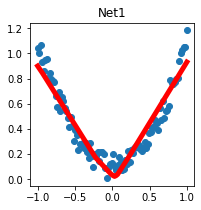

In [24]:
import matplotlib.pyplot as plt
prediction = net1(x)
plt.figure(1, figsize=(10, 3))
plt.subplot(131)
plt.title('Net1')
plt.scatter(x.data.numpy(), y.data.numpy())
plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

In [21]:
y.data

tensor([[1.0447],
        [1.0034],
        [1.0667],
        [0.9332],
        [0.8578],
        [0.9481],
        [0.9588],
        [0.8012],
        [0.8435],
        [0.7975],
        [0.7823],
        [0.7694],
        [0.6618],
        [0.5698],
        [0.6953],
        [0.5444],
        [0.6552],
        [0.6192],
        [0.5648],
        [0.5451],
        [0.4839],
        [0.4159],
        [0.4925],
        [0.4216],
        [0.3067],
        [0.3891],
        [0.3514],
        [0.2346],
        [0.2767],
        [0.2799],
        [0.2834],
        [0.2505],
        [0.2841],
        [0.2184],
        [0.1714],
        [0.2840],
        [0.1806],
        [0.0958],
        [0.1975],
        [0.1839],
        [0.2165],
        [0.1402],
        [0.2141],
        [0.2137],
        [0.2014],
        [0.0893],
        [0.0053],
        [0.0857],
        [0.1228],
        [0.1281],
        [0.1966],
        [0.0993],
        [0.0726],
        [0.1106],
        [0.1748],
        [0

In [15]:
y.shape

torch.Size([100, 1])